In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 300

import warnings
import itertools
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

# Time Series
***
*Looking to the past so we can understand (or predict) the future.*
<br><br><br>

**João Vítor Perez de Souza**

Recently it has become common for us to hear news like:

- Moving average of COVID-19 cases is increasing/decreasing.
    
    
- Infection rates are influenced by the climate;

    
- Highest temperatures ever recorded in Canada.

Briefly, a Time Series comprises the variation of *some variable* **across time**.

If it happens repeatedly and it is recorded in an ordered fashion (and in fixed intervals), it is a Time Series

Stock prices, number of births, and infection cases are examples of such.

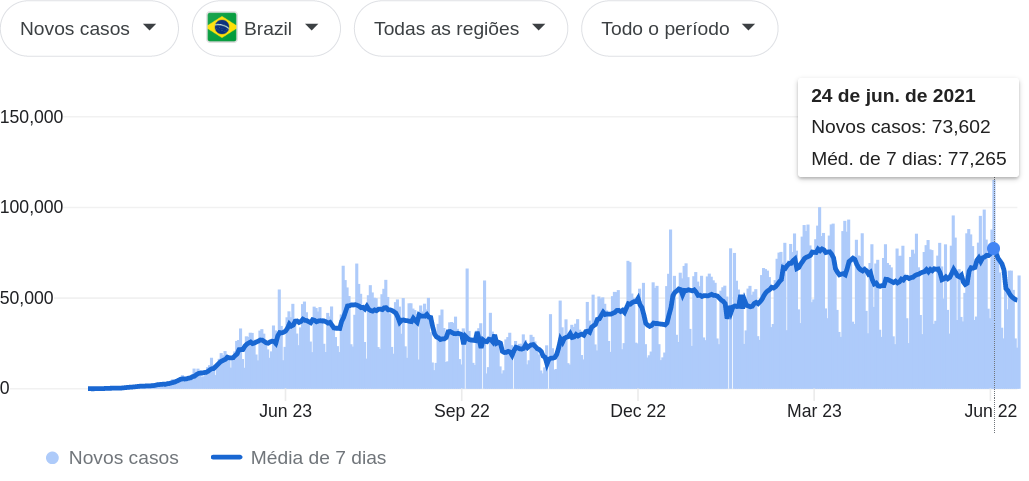
<font size=3>**COVID-19 cases in Brazil**

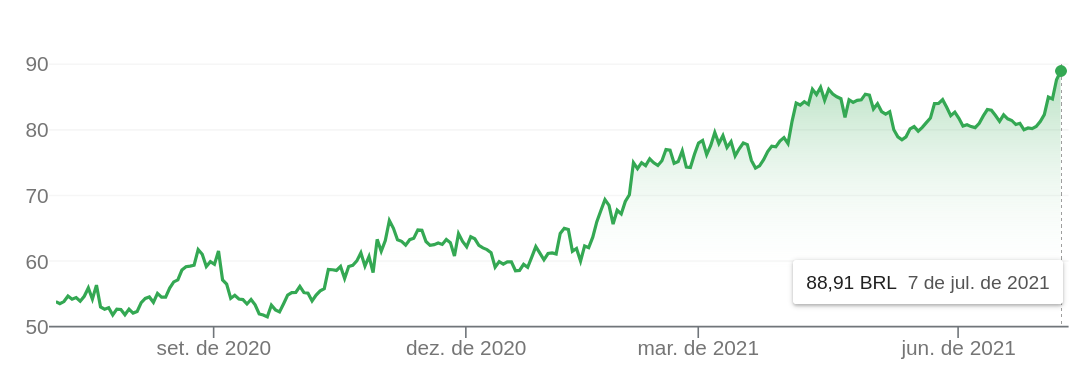
<font size=3>**Alphabet stock price**


## Differences between multiple regression  and TS

<font size=5>
In common models we consider the effect of a set of variables in the outcome
$$ y = b0 + b1*x1 + b2*x2 + ... + bn*xn $$
    1. We want to understand the relationship of variables; <br>
    2. The order of data collection does not matter too much; </font>


In TS we only consider the variable that we are studying...

But wait, **is that enough?**

For TS we assume that the variance inflicted by other variables is already present in past observations
$$ y = c + y(t-1) + y(t-2) + ... + y(t-n) + e $$

In [2]:
srag = pd.read_csv('./data/srag_cases_2010-2020.csv')
srag = srag.query('ANO != 2020')
srag['DT_NOTIFIC'] = pd.to_datetime(srag['DT_NOTIFIC'], format='%Y-%m-%d')

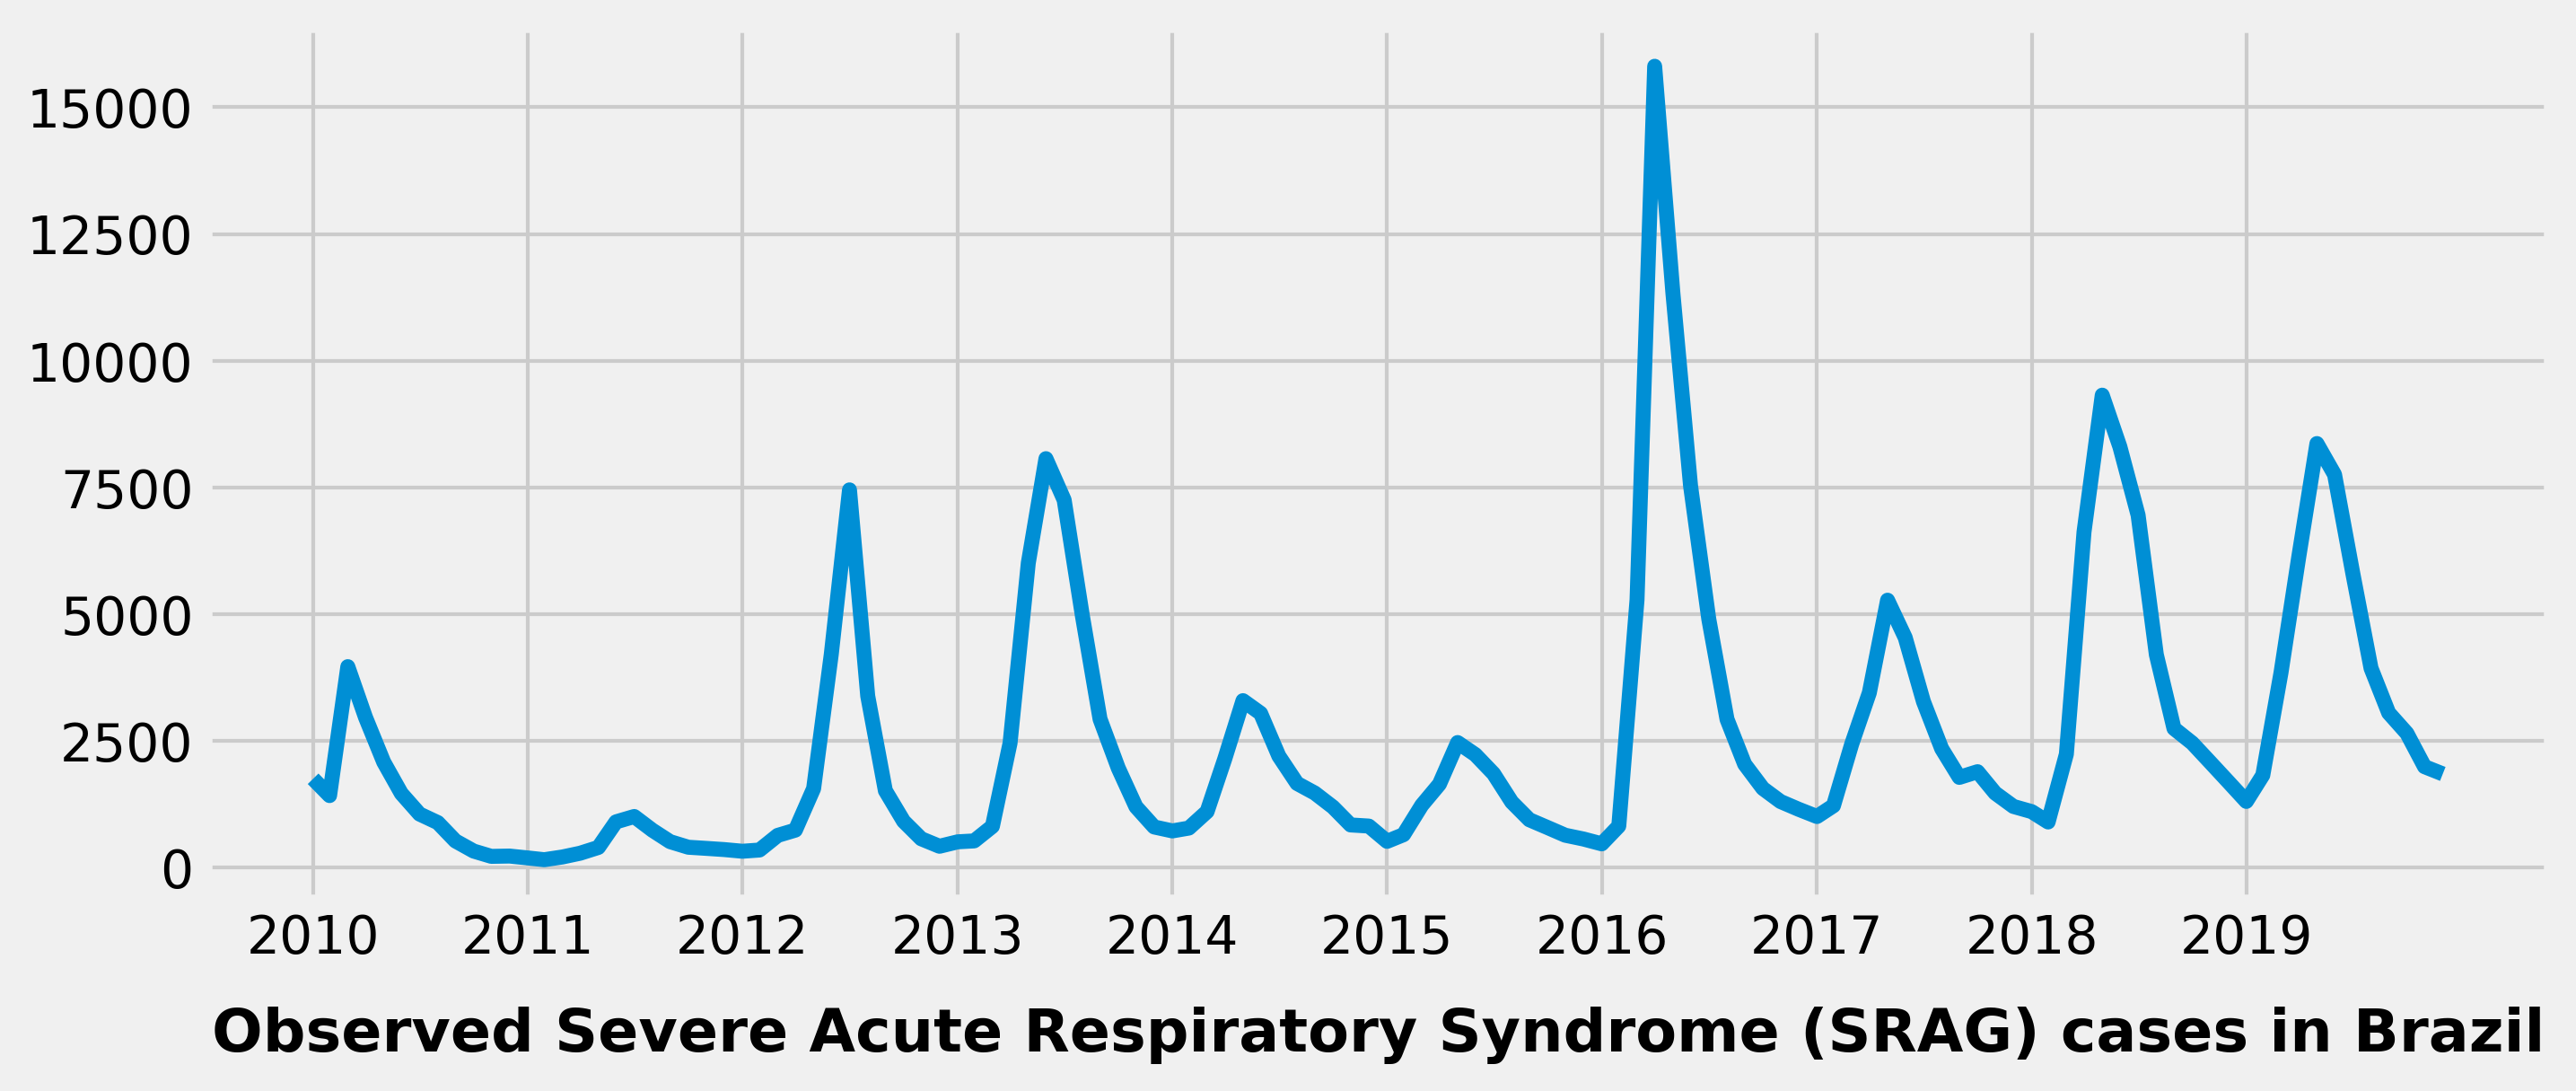

In [3]:
fig, ax = plt.subplots(1,1, figsize=(10,4))
ax.plot(srag['DT_NOTIFIC'], srag['CASOS'])
ax.set_xticks(srag['DT_NOTIFIC'][::12])
ax.set_xticklabels(srag['DT_NOTIFIC'].dt.year[::12])
ax.set_title('Observed Severe Acute Respiratory Syndrome (SRAG) cases in Brazil', 
         y=-0.2, x=0.5, weight='bold', fontsize=16); 

In [4]:
fig.savefig('./figures/SRAG_2010_2019_Brazil.png', bbox_inches='tight',dpi=300)

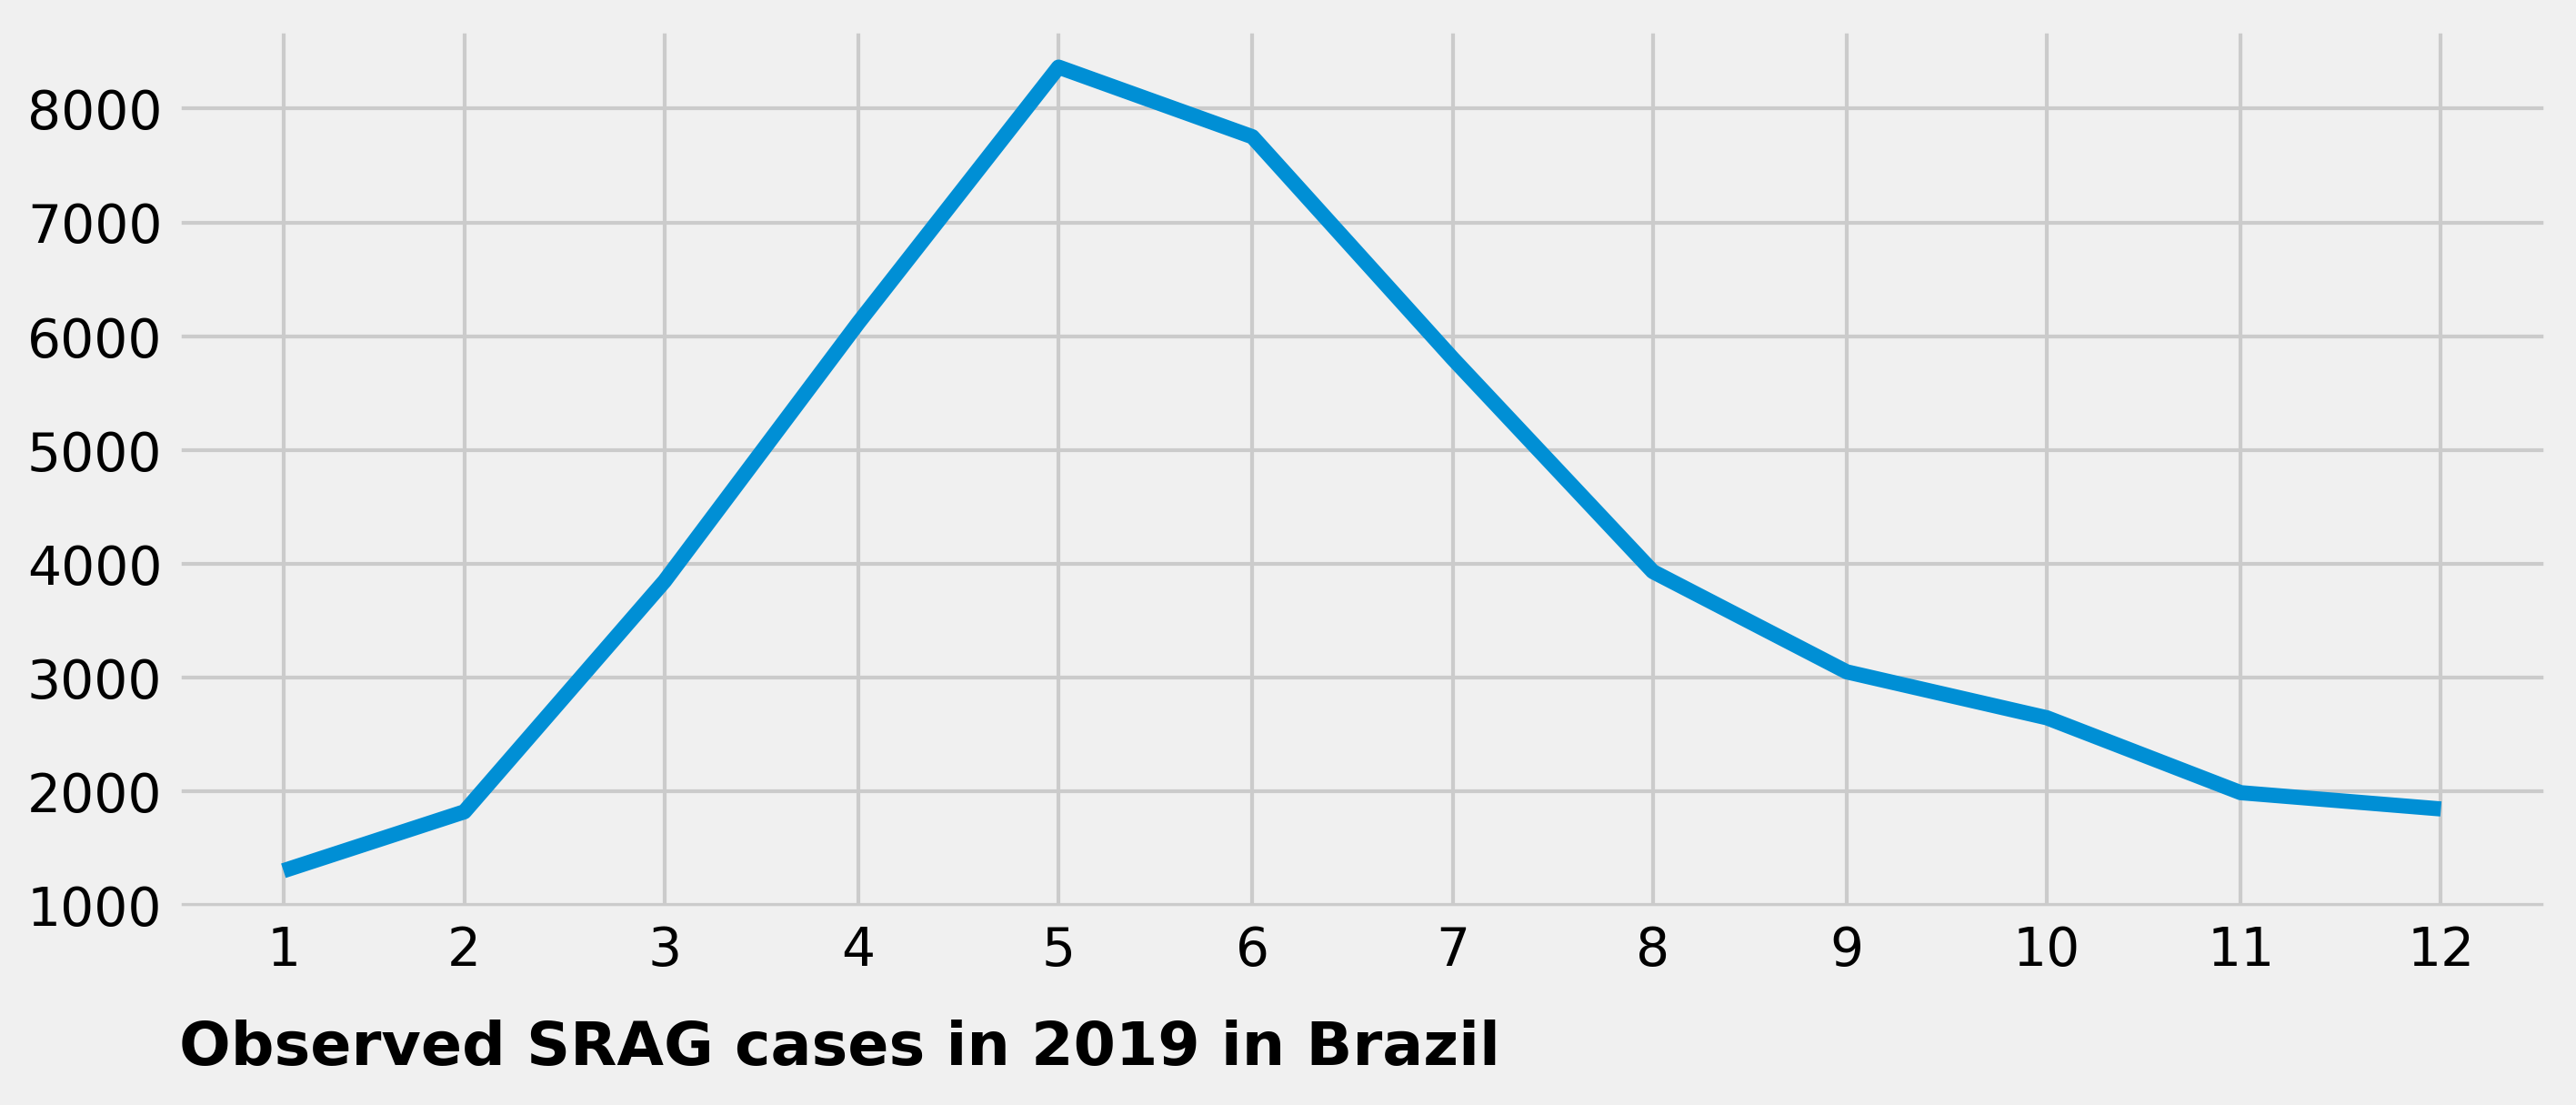

In [5]:
srag_19 = (srag['ANO'] == 2019) # Selecting only 2019
fig, ax = plt.subplots(1,1, figsize=(10,4))
ax.plot(srag[srag_19]['DT_NOTIFIC'], srag[srag_19]['CASOS'])
ax.set_xticks(srag[srag_19]['DT_NOTIFIC'])
ax.set_xticklabels(srag[srag_19]['DT_NOTIFIC'].dt.month)
ax.set_title('Observed SRAG cases in 2019 in Brazil', 
         y=-0.2, x=0.28, weight='bold', fontsize=16); 

In [6]:
fig.savefig('./figures/SRAG_2019_Brazil.png', bbox_inches='tight',dpi=300)

Autocorrelation, moving averages

In [7]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [8]:
import itertools
import statsmodels.api as sm

In [9]:
y = srag[['DT_NOTIFIC', 'CASOS']].set_index('DT_NOTIFIC')['CASOS']

<img src='./figures/lag-explanation.PNG'> </img>

**Lags**

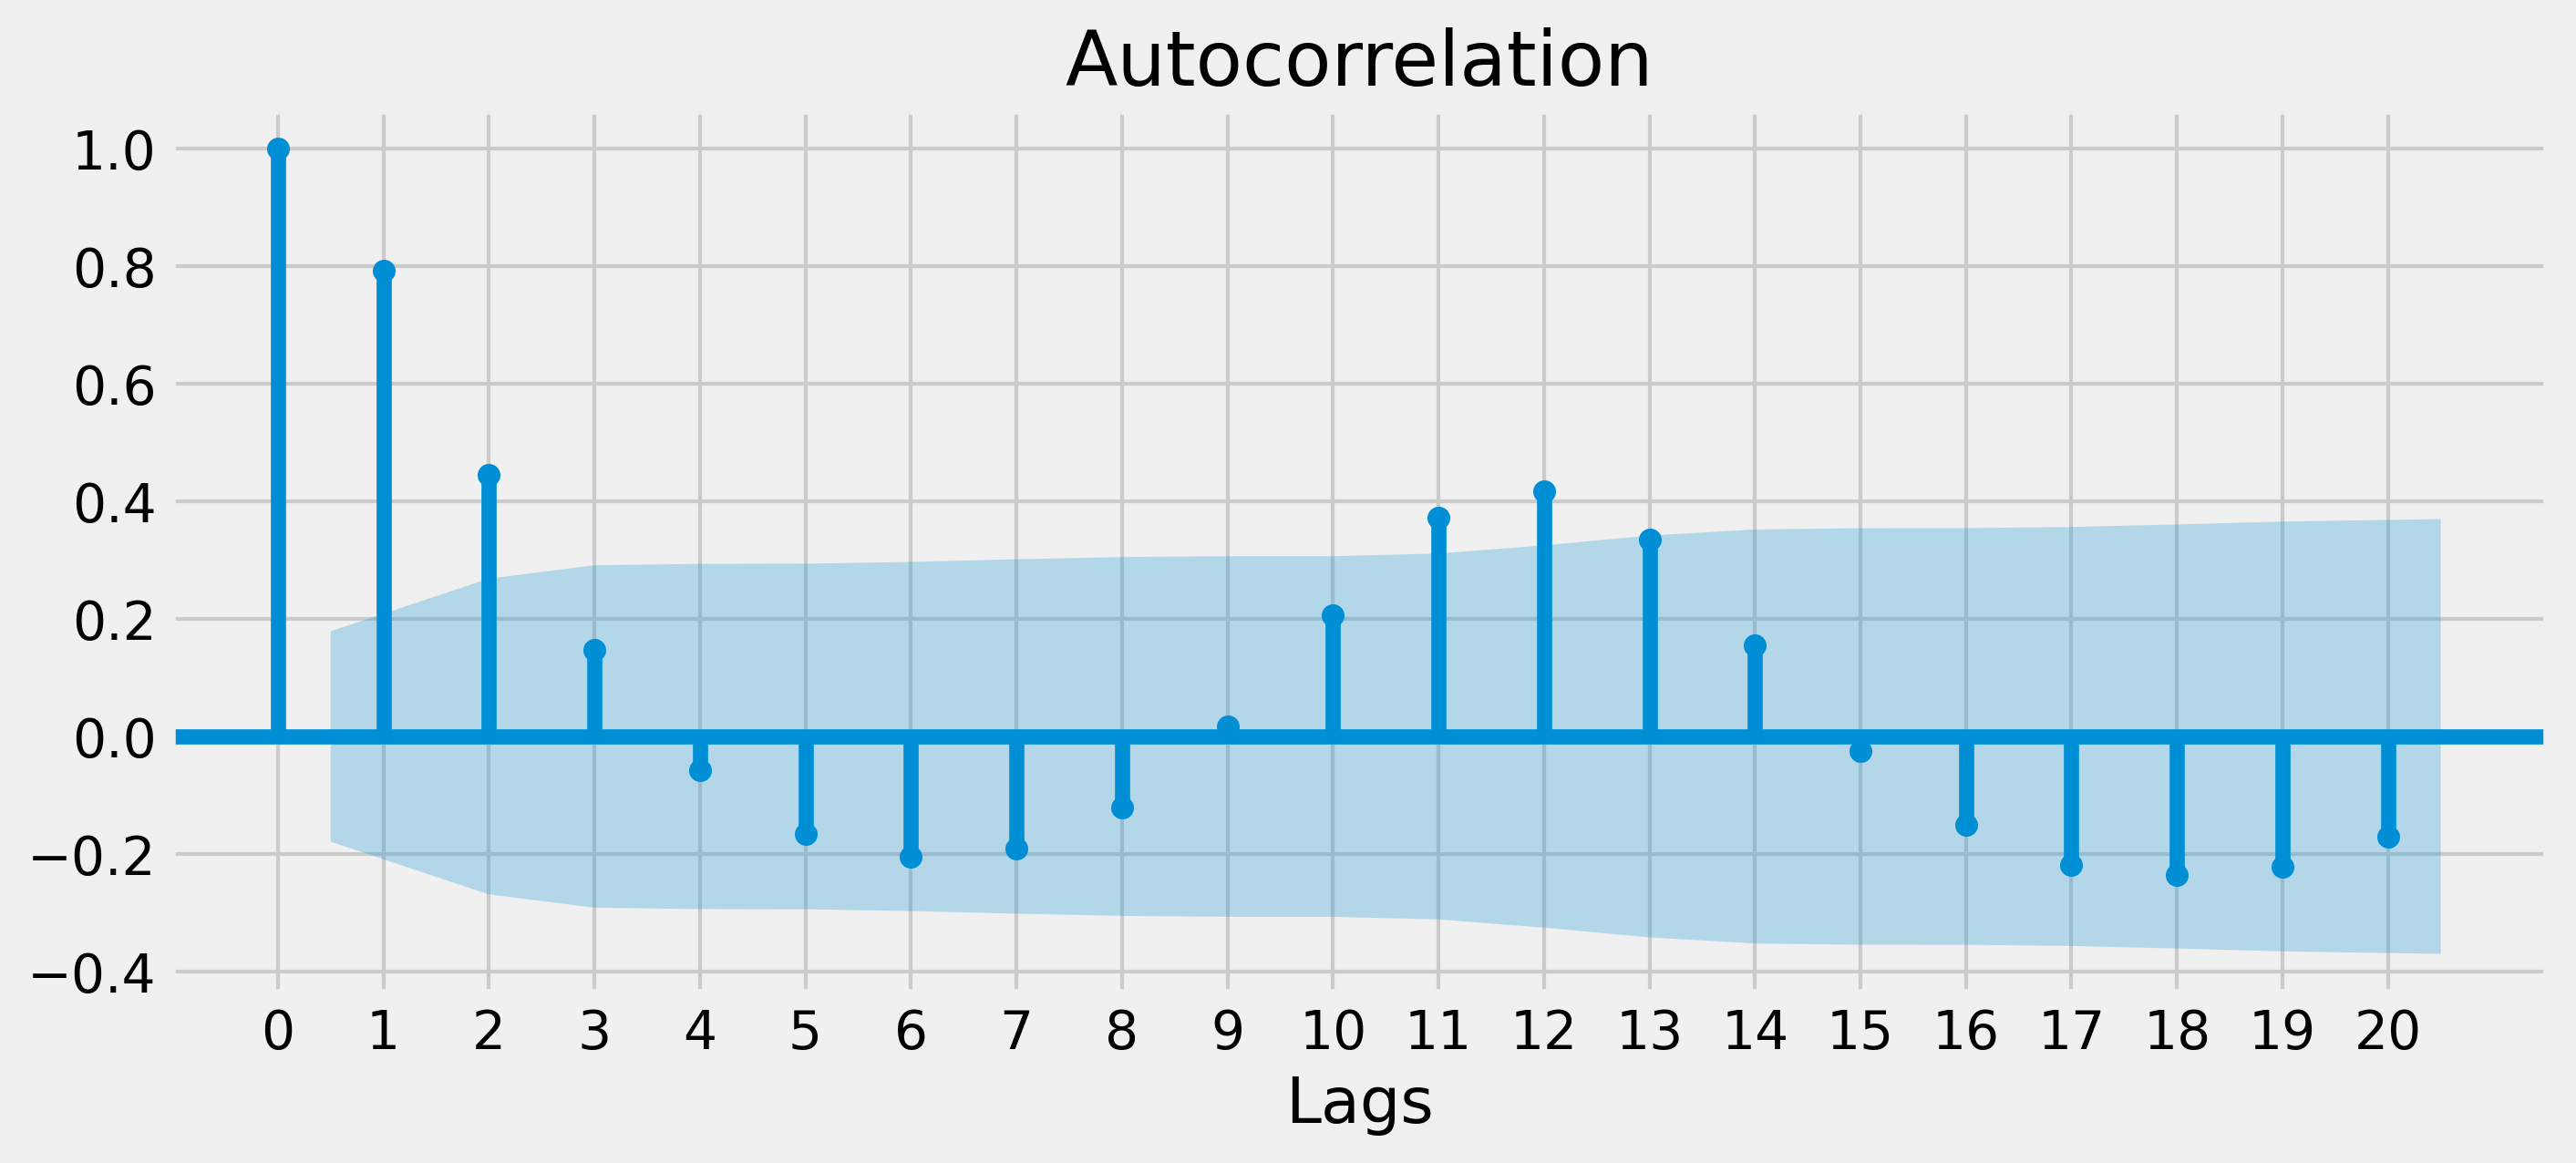

In [10]:
fig, ax = plt.subplots(figsize=(10,4))
plot_acf(y, ax=ax, lags=20); # This is the plot_acf() function from the statsmodels package
ax.set_xticks([i for i in range(21)])
ax.set_xticklabels([i for i in range(21)])
ax.set_xlabel('Lags');

In [11]:
fig.savefig('./figures/autocorrelation_time_series.png', bbox_inches='tight',dpi=300)

In [12]:
# p = d = q = range(0,2)
# pdq=list(itertools.product(p,d,q))

In [13]:
# seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

In [14]:
# warnings.filterwarnings("ignore") # specify to ignore warning messages

# for param in pdq:
#     for param_seasonal in seasonal_pdq:
#         try:
#             mod = sm.tsa.statespace.SARIMAX(y,
#                                             order=param,
#                                             seasonal_order=param_seasonal,
#                                             enforce_stationarity=True,
#                                             enforce_invertibility=False)
#             results = mod.fit()
#             print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
#         except:
#             continue

# Time series components

In [15]:
from statsmodels.tsa.seasonal import seasonal_decompose

The **observed** TS can be decomposed in three parts:
1. *Trend* - the increasing or decreasing value in the series;
2. *Seasonality* - The repeating short-term cycle in the series;
3. *Residuals* - The random variation in the series.

The package statsmodels has many utilities for Time Series analysis

In [16]:
decomp = seasonal_decompose(srag[['DT_NOTIFIC', 'CASOS']].set_index('DT_NOTIFIC'))

## Trend
The increasing or decreasing value in the series


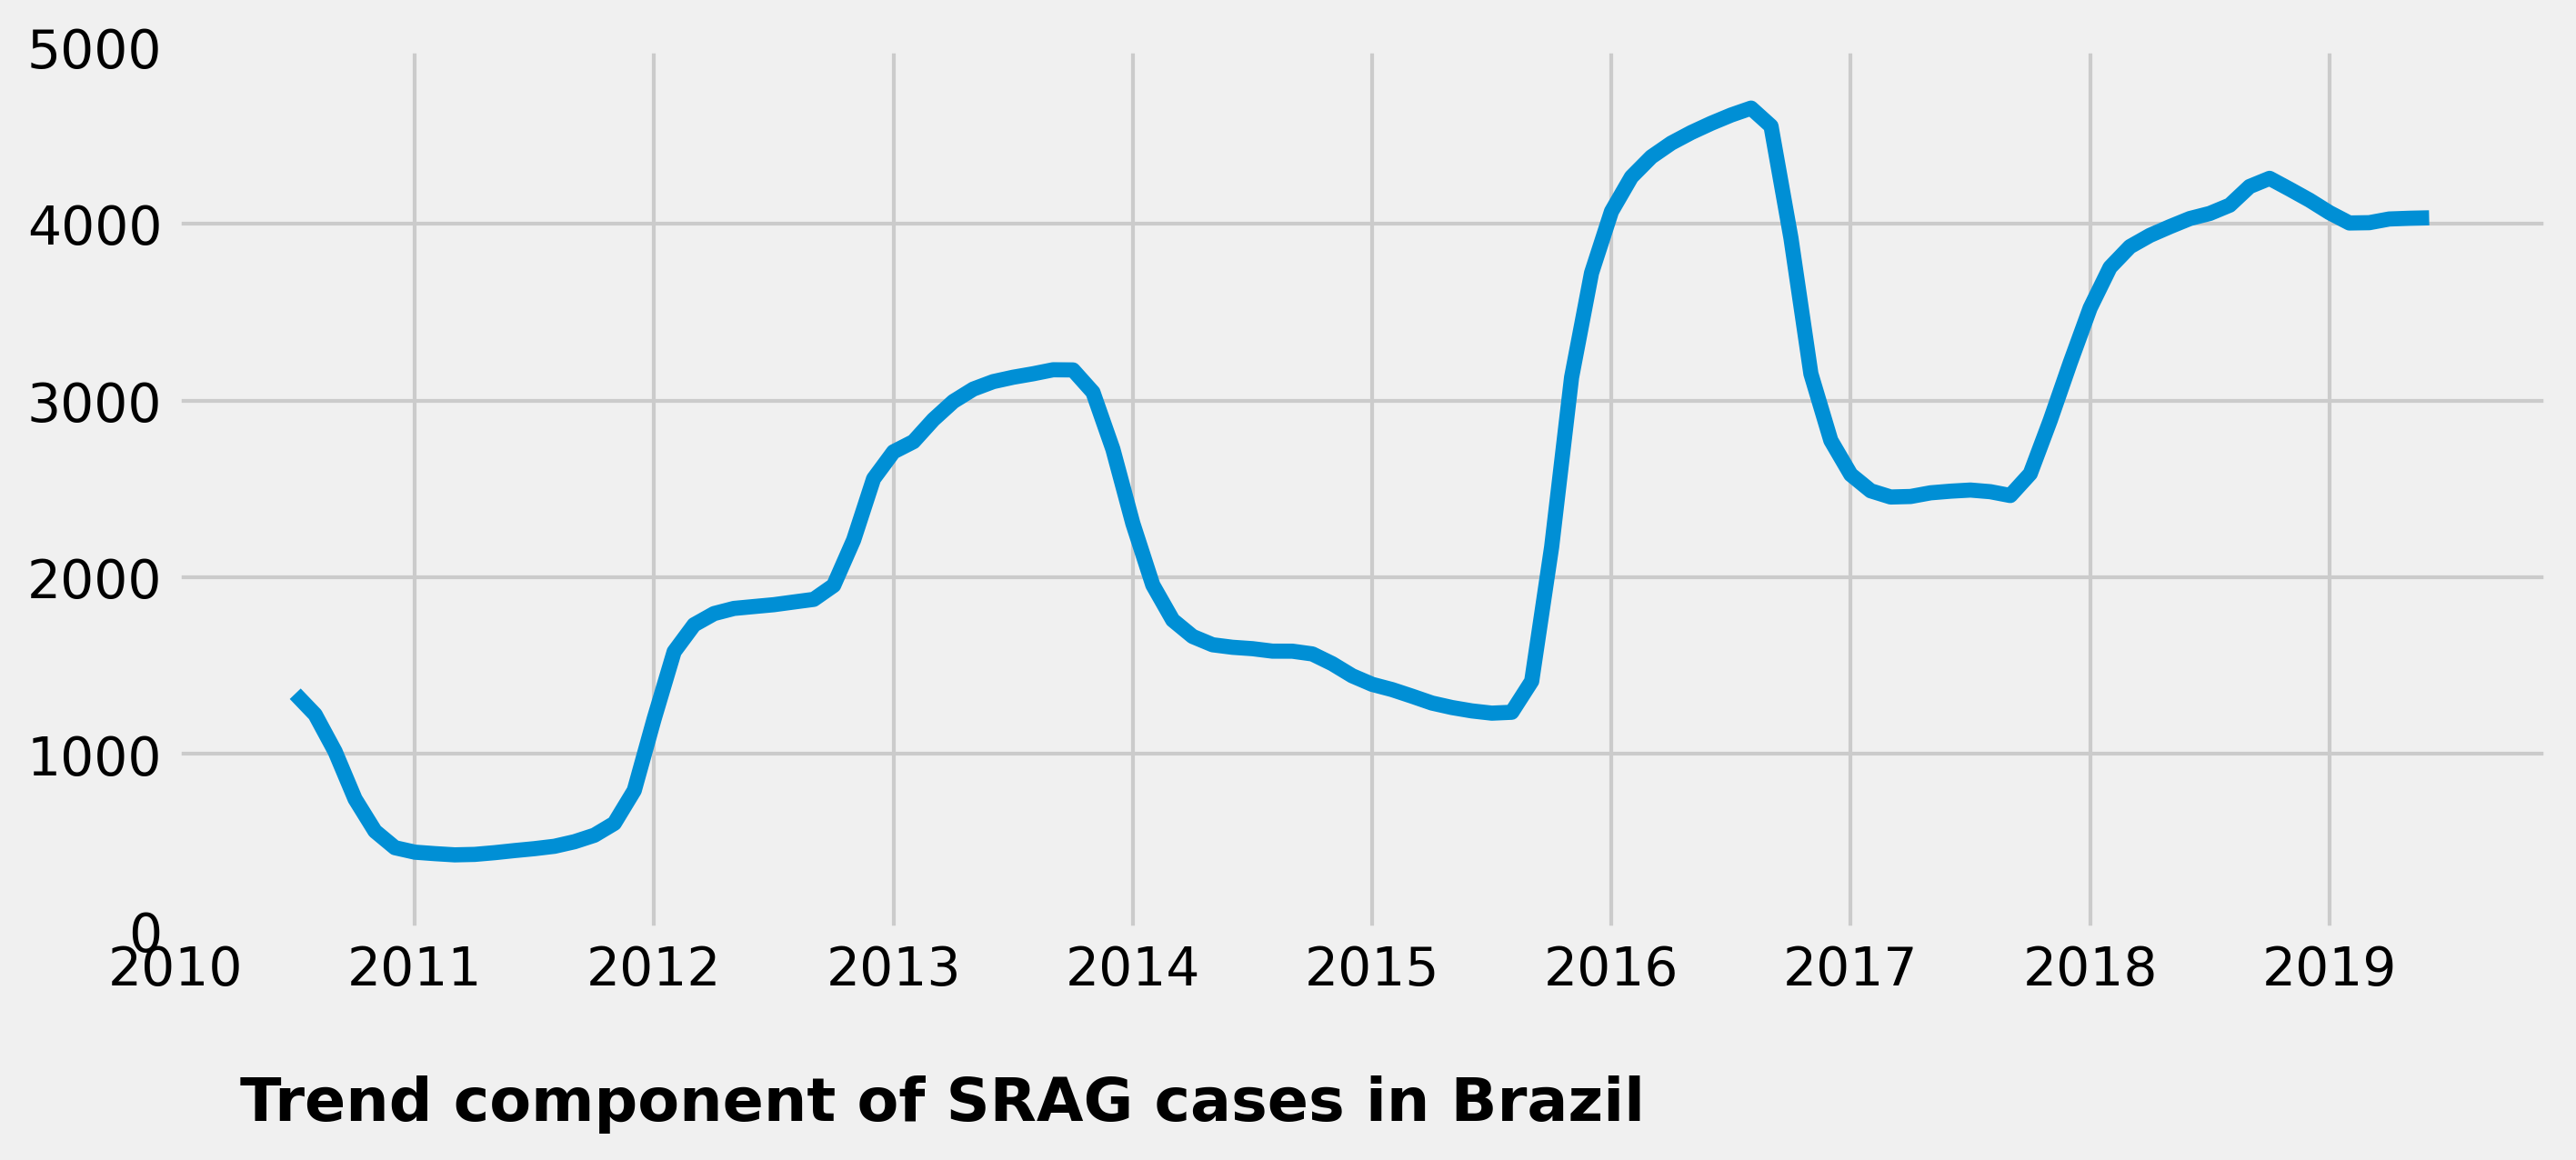

In [17]:
fig, ax = plt.subplots(figsize=(10,4))
decomp.trend.plot(ax=ax, xlabel='', ylim=(0,5000))
ax.set_title('Trend component of SRAG cases in Brazil', y=-0.24,x=0.323, weight='bold', fontsize=16);

In [18]:
fig.savefig('./figures/tren_time_series.png', bbox_inches='tight',dpi=300)

## Seasonality
The repeating short-term cycle in the series

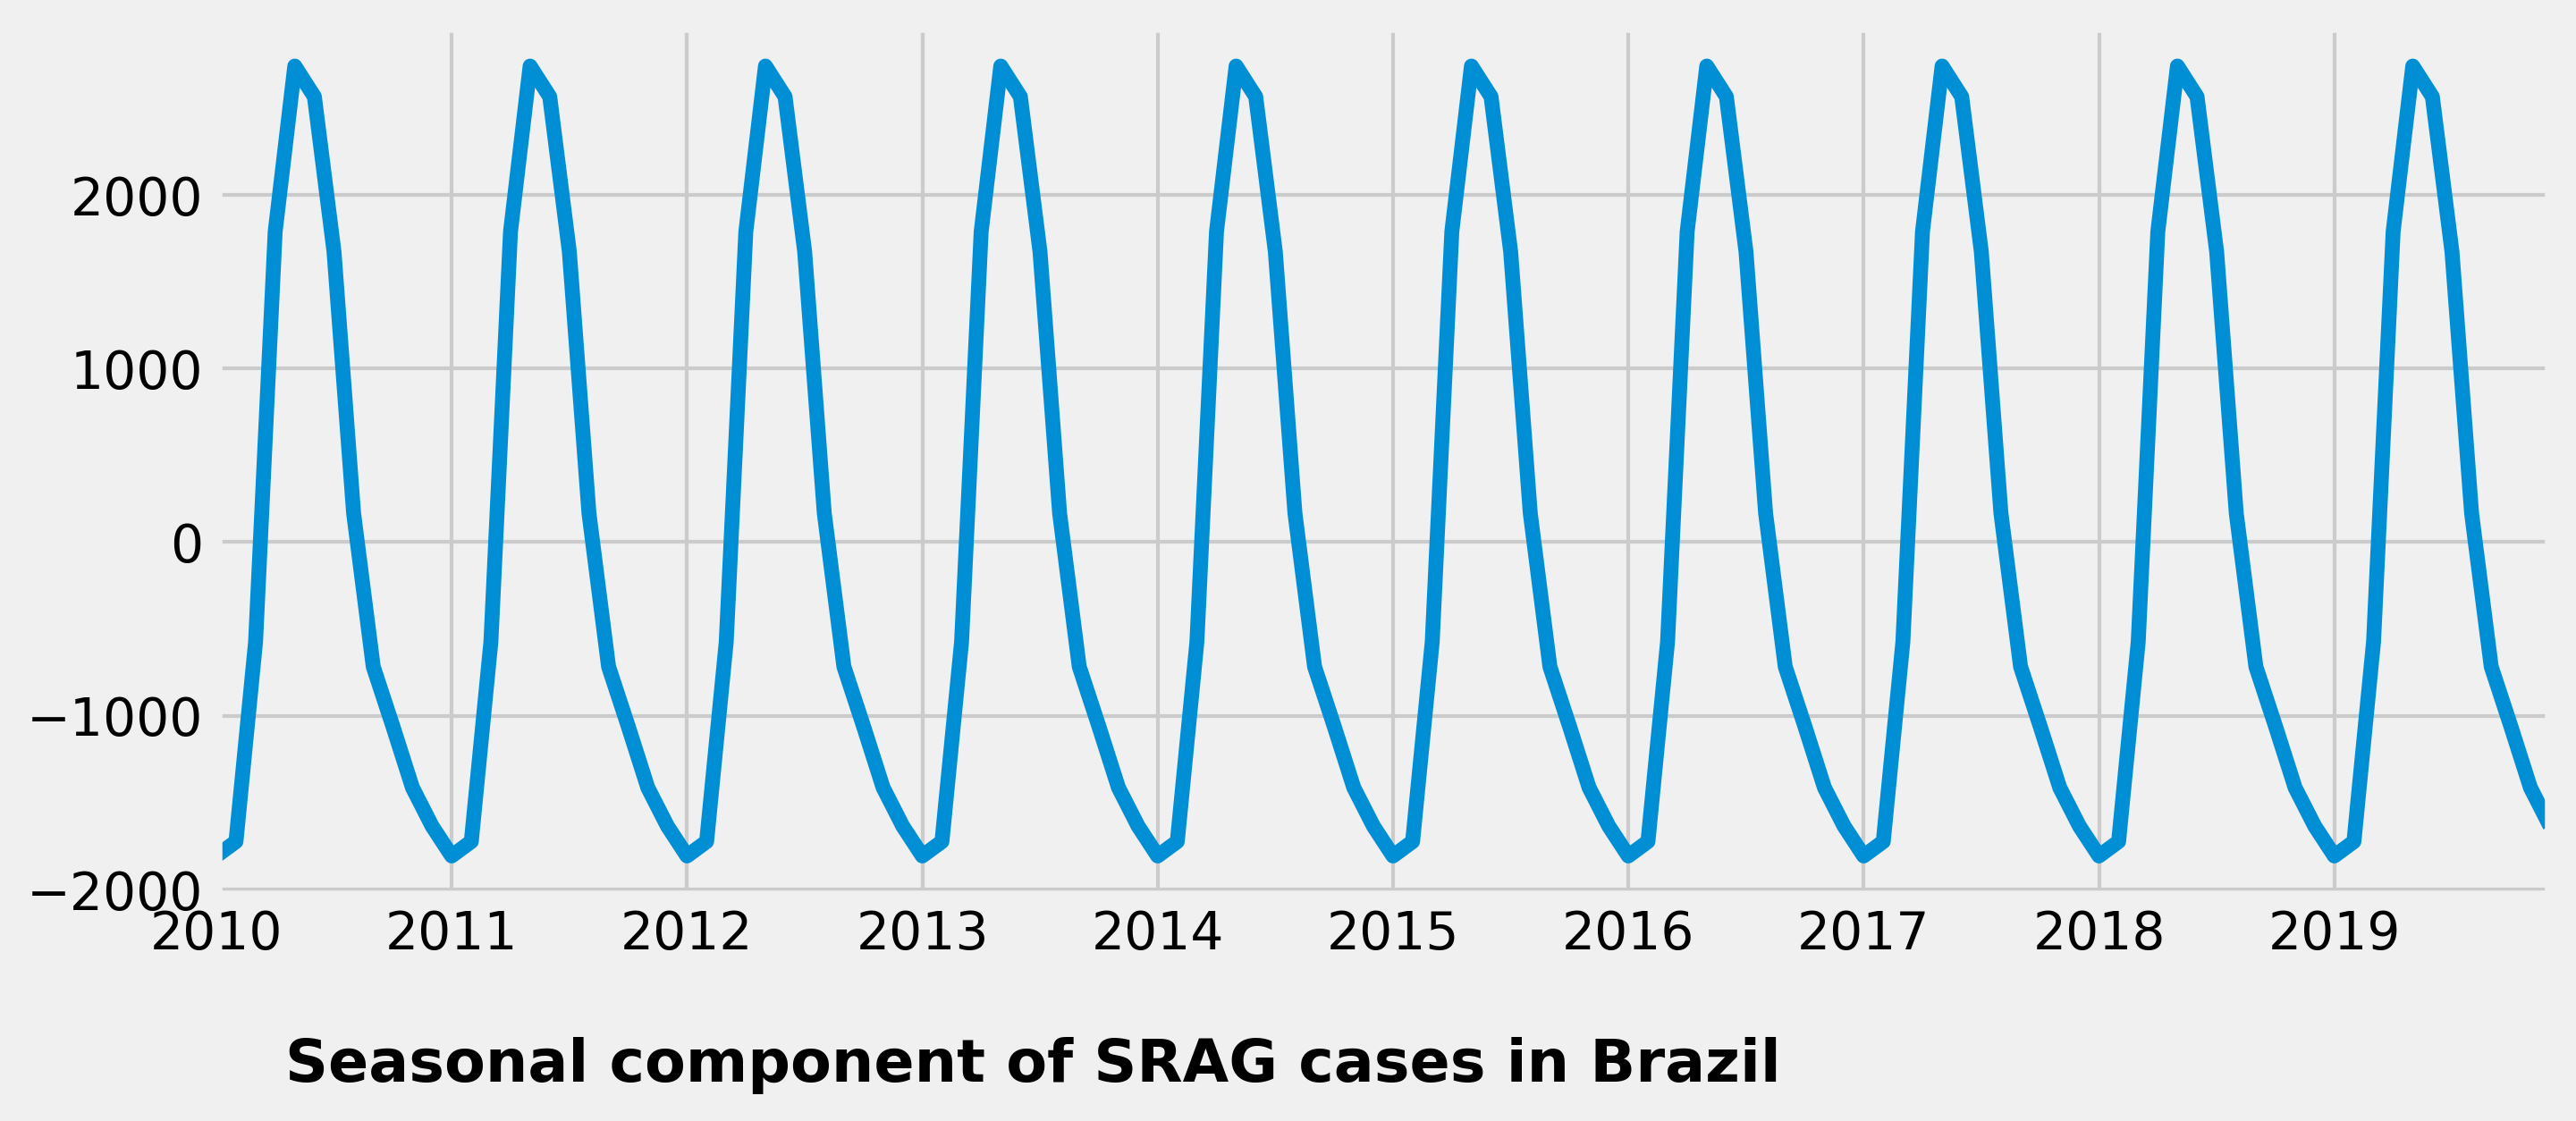

In [19]:
fig, ax = plt.subplots(figsize=(10,4))
decomp.seasonal.plot(ax=ax, xlabel='')
ax.set_title('Seasonal component of SRAG cases in Brazil', y=-0.24,x=0.35, weight='bold', fontsize=16);

In [20]:
fig.savefig('./figures/seasonality_time_series.png', bbox_inches='tight',dpi=300)

## Residuals
The random variation in the series. <br>
Ideally, we want the residuals to be as low as possible.

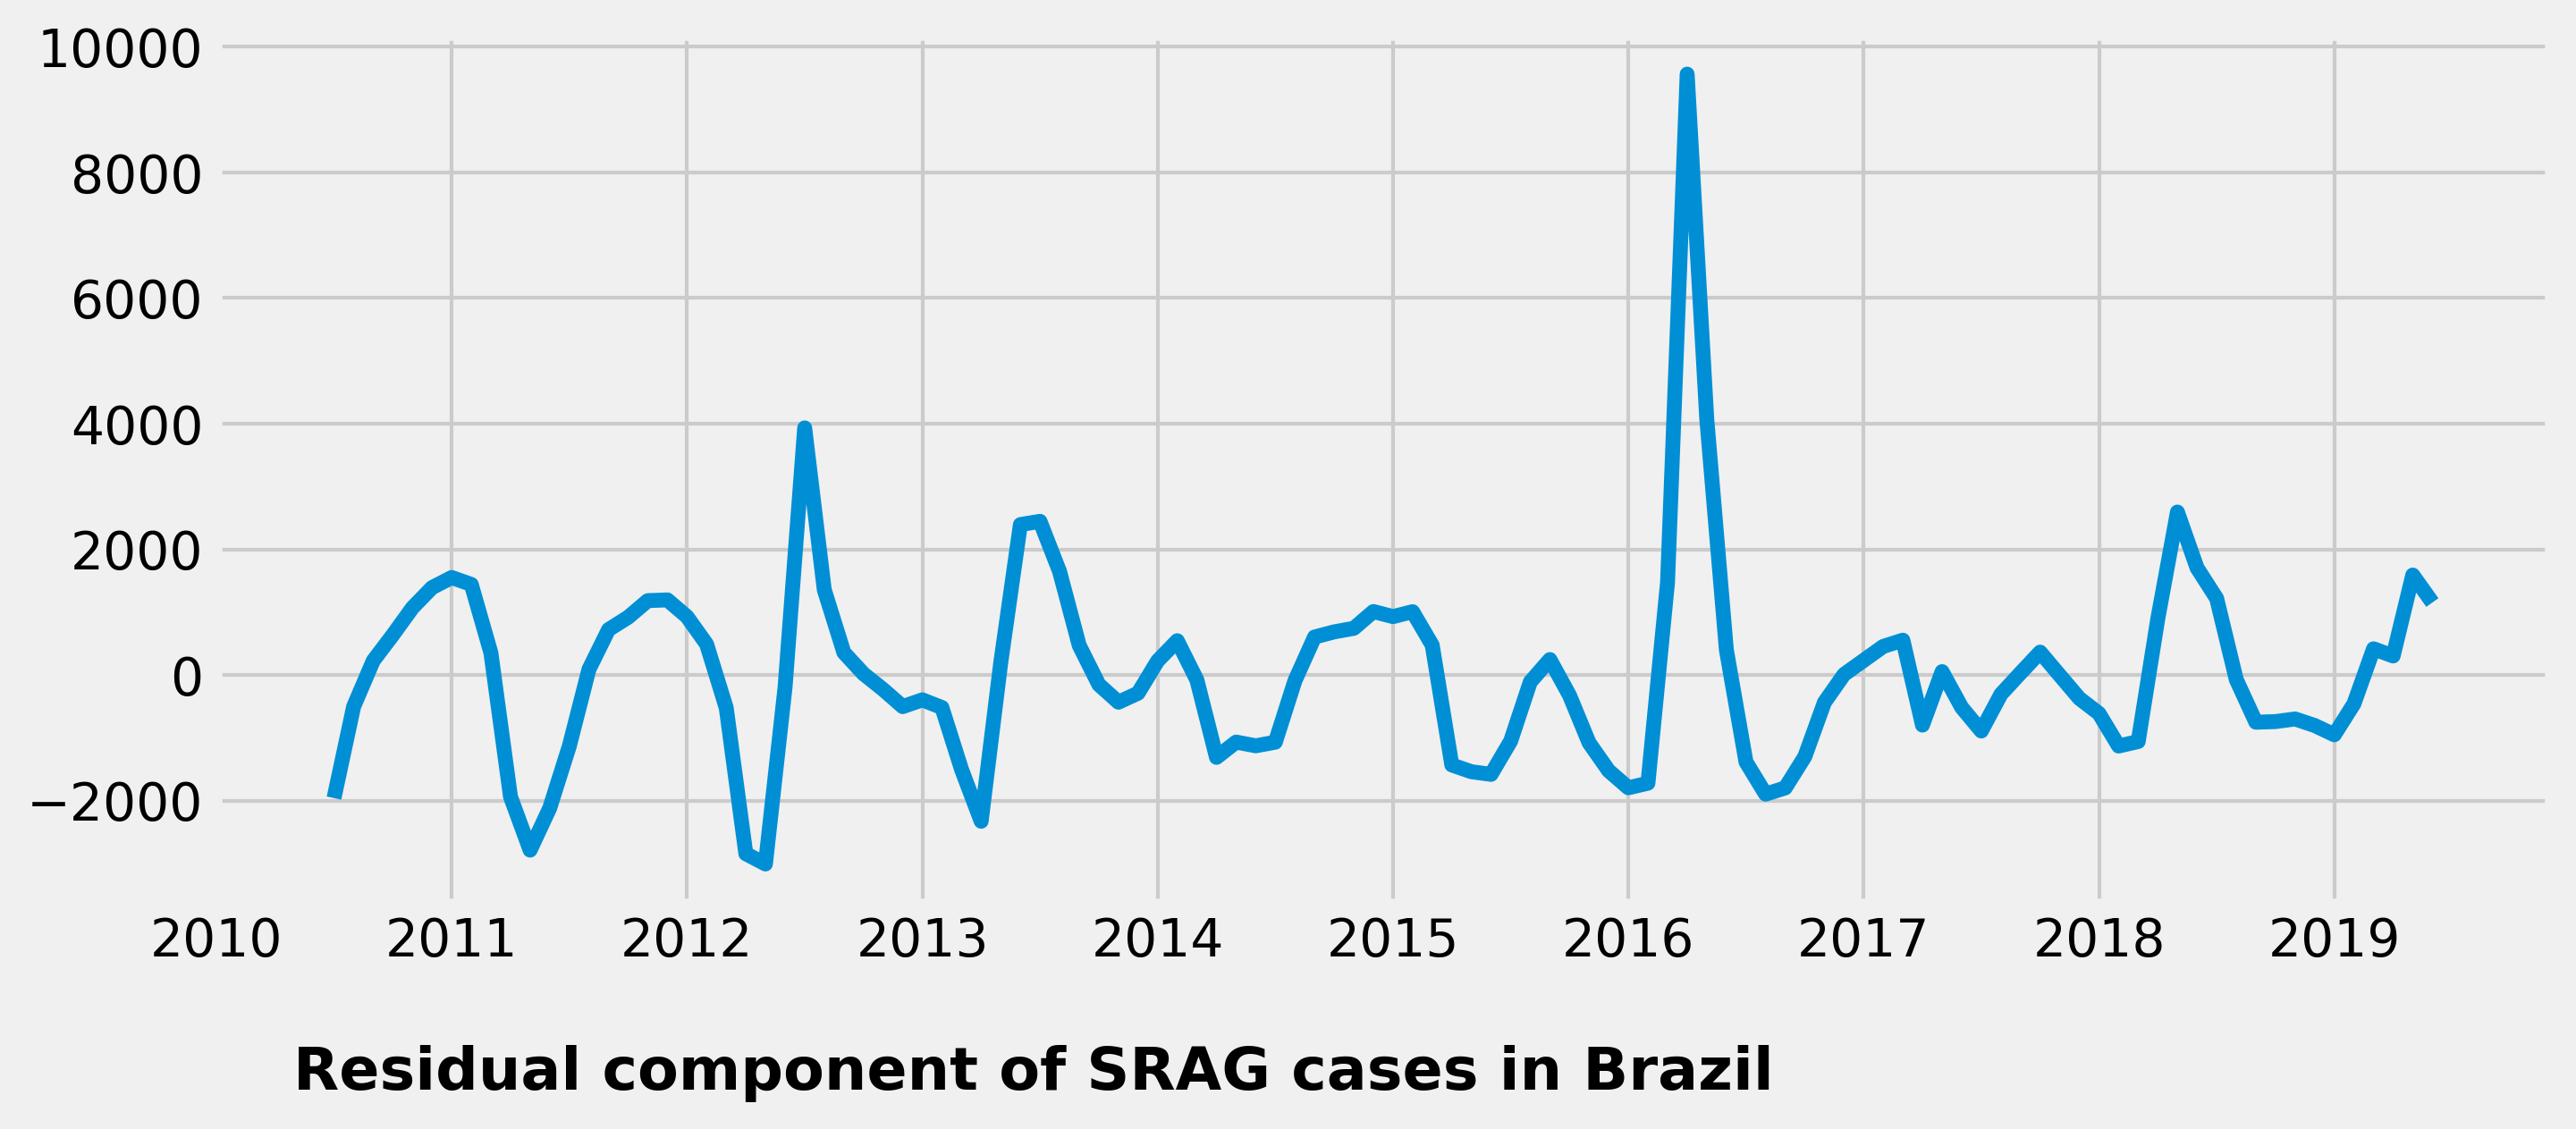

In [21]:
fig, ax = plt.subplots(figsize=(10,4))
decomp.resid.plot(ax=ax, xlabel='')
ax.set_title('Residual component of SRAG cases in Brazil', 
             y=-0.24,x=0.35, weight='bold', fontsize=16);

In [22]:
fig.savefig('./figures/residual_time_series.png', bbox_inches='tight',dpi=300)

# Forecasting
ARIMA(*p,d,q*) - autoregressive integrated moving average model
* *p* - order of the autoregressive model;
* *d* - degree of differencing - *stationary*;
* *q* - order of the moving-average model


In [23]:
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(0, 1, 1),
                                seasonal_order=(0, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.2742      0.045      6.142      0.000       0.187       0.362
ma.S.L12      -0.8181      0.122     -6.701      0.000      -1.057      -0.579
sigma2      2.677e+06   1.53e+05     17.474      0.000    2.38e+06    2.98e+06


/media/newhd/joao-souza/anaconda/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
/media/newhd/joao-souza/anaconda/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


/media/newhd/joao-souza/anaconda/lib/python3.8/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


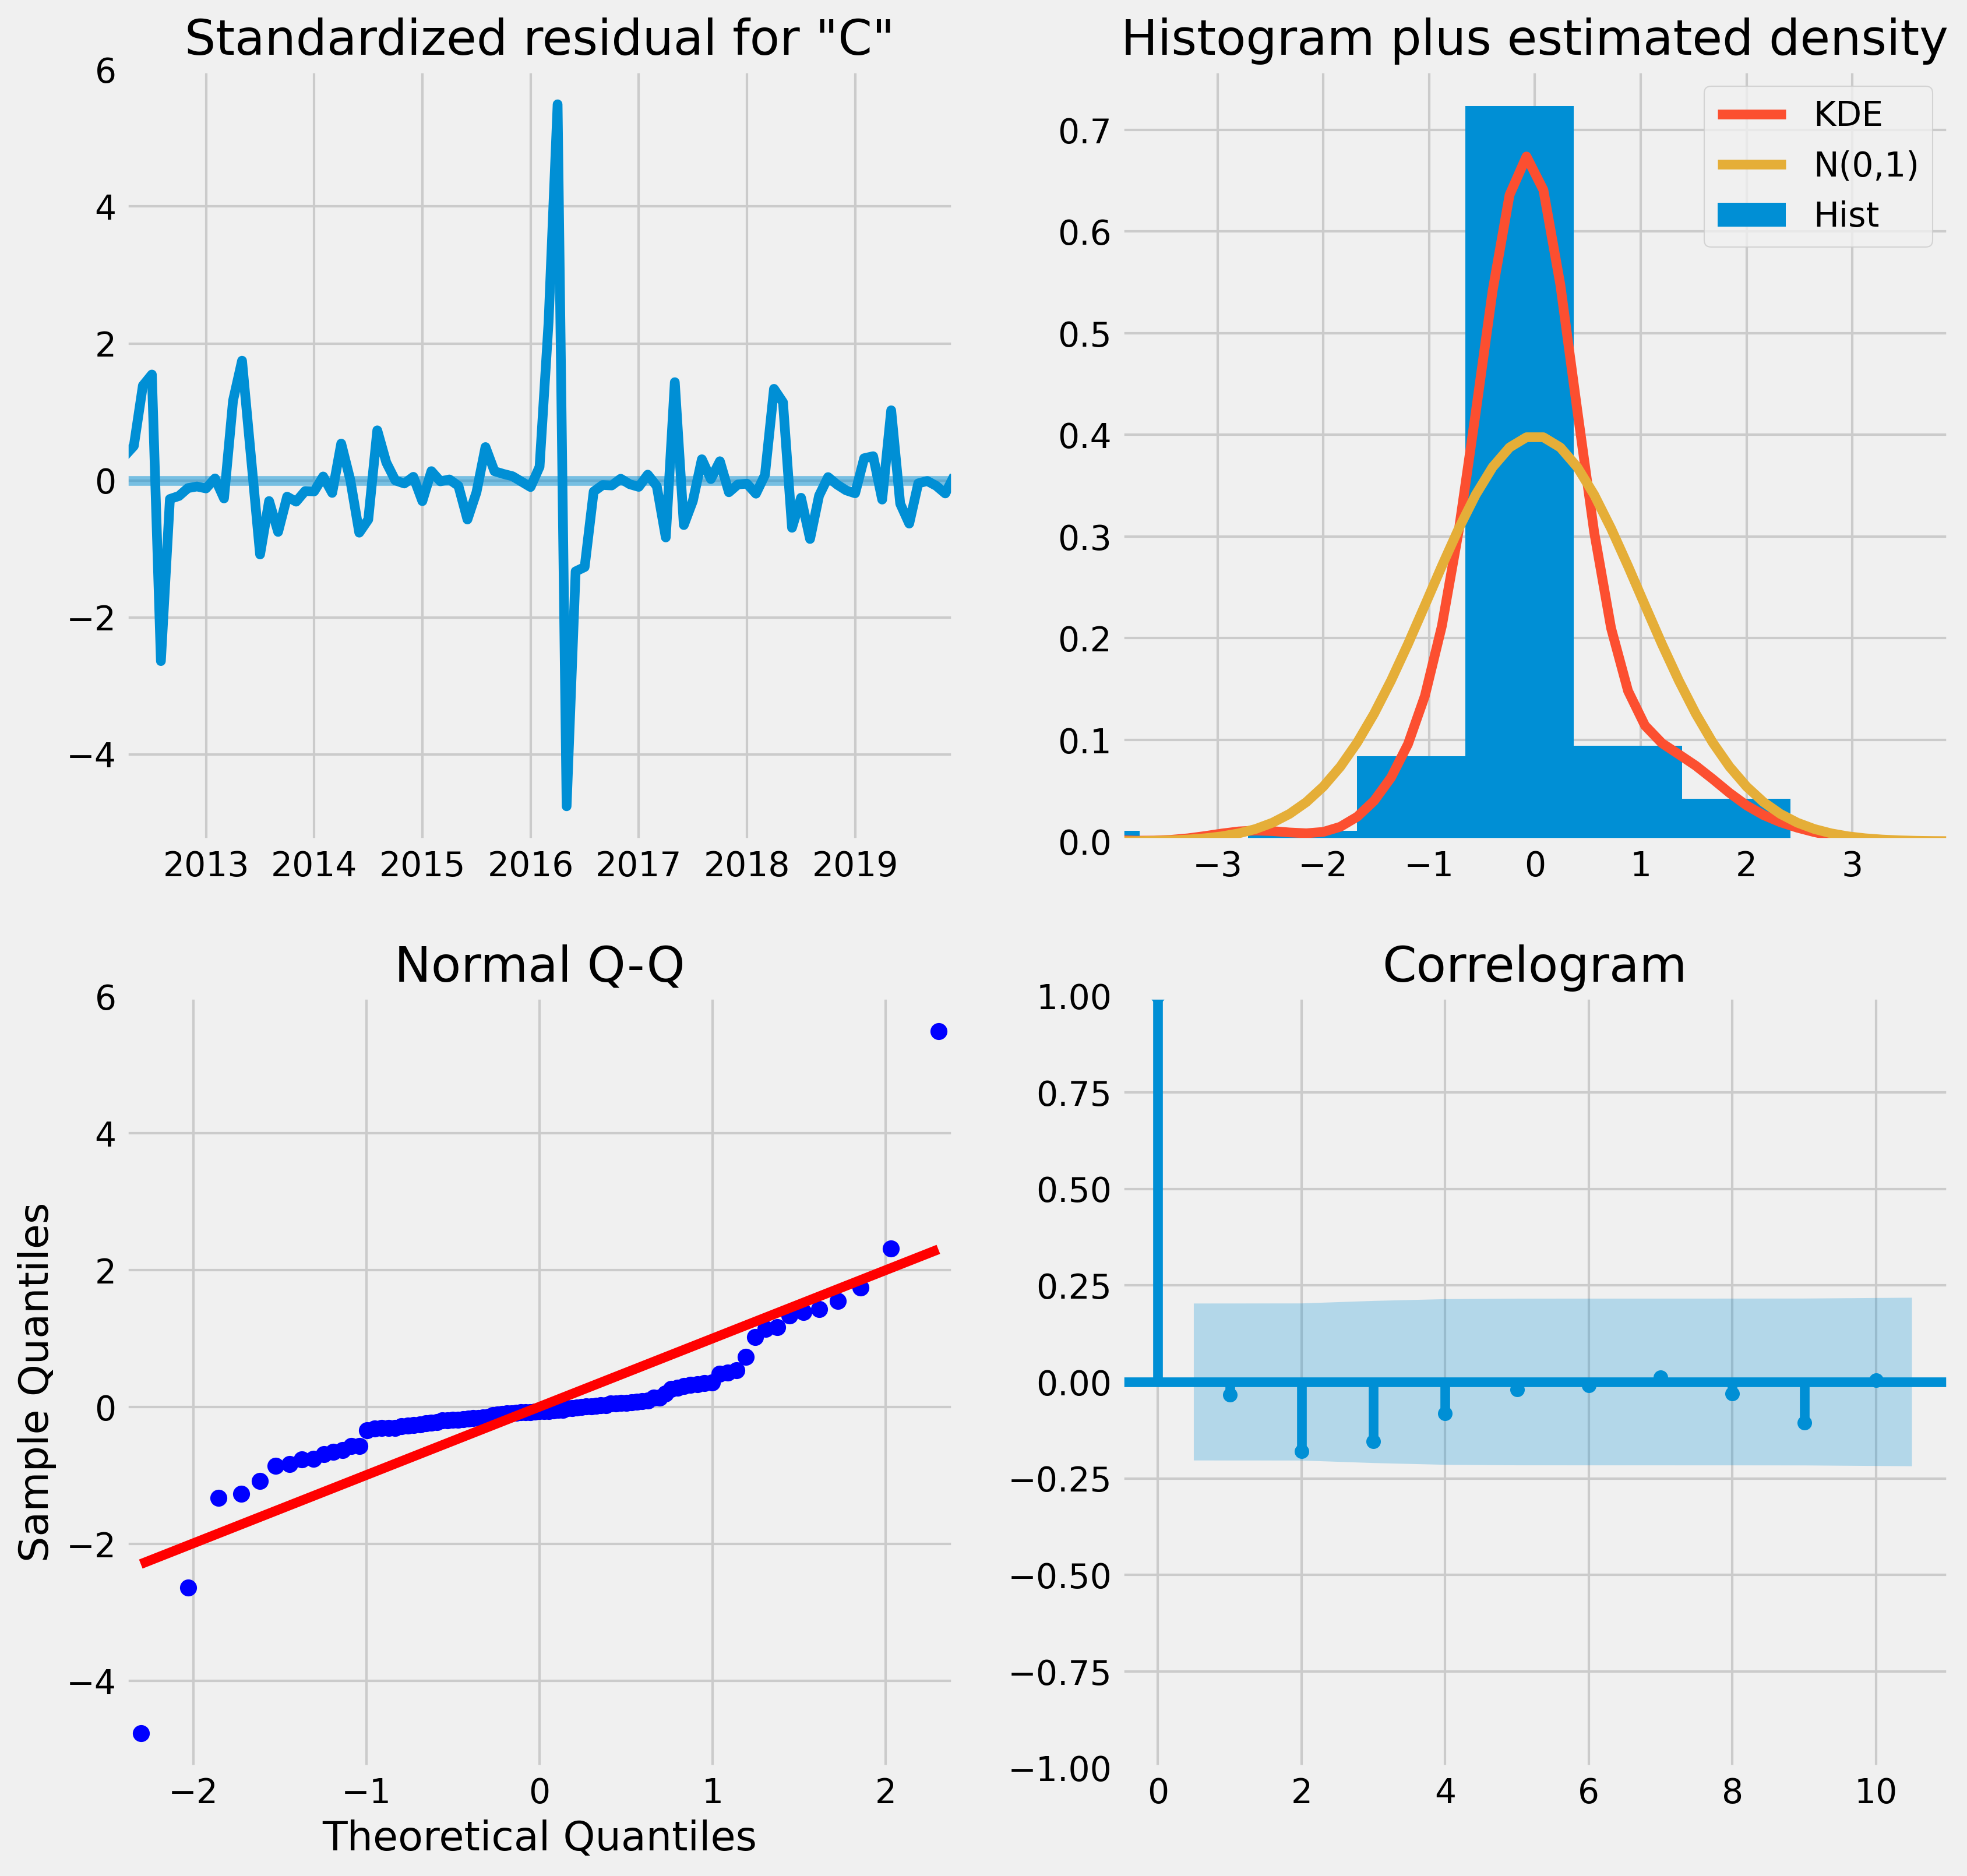

In [24]:
results.plot_diagnostics(figsize=(12,12))
plt.show()

In [25]:
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(0, 1, 1),
                                seasonal_order=(0, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

pred = results.get_prediction(start=pd.to_datetime('2019-01-31'), dynamic=False)
pred_ci = pred.conf_int()

/media/newhd/joao-souza/anaconda/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
/media/newhd/joao-souza/anaconda/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


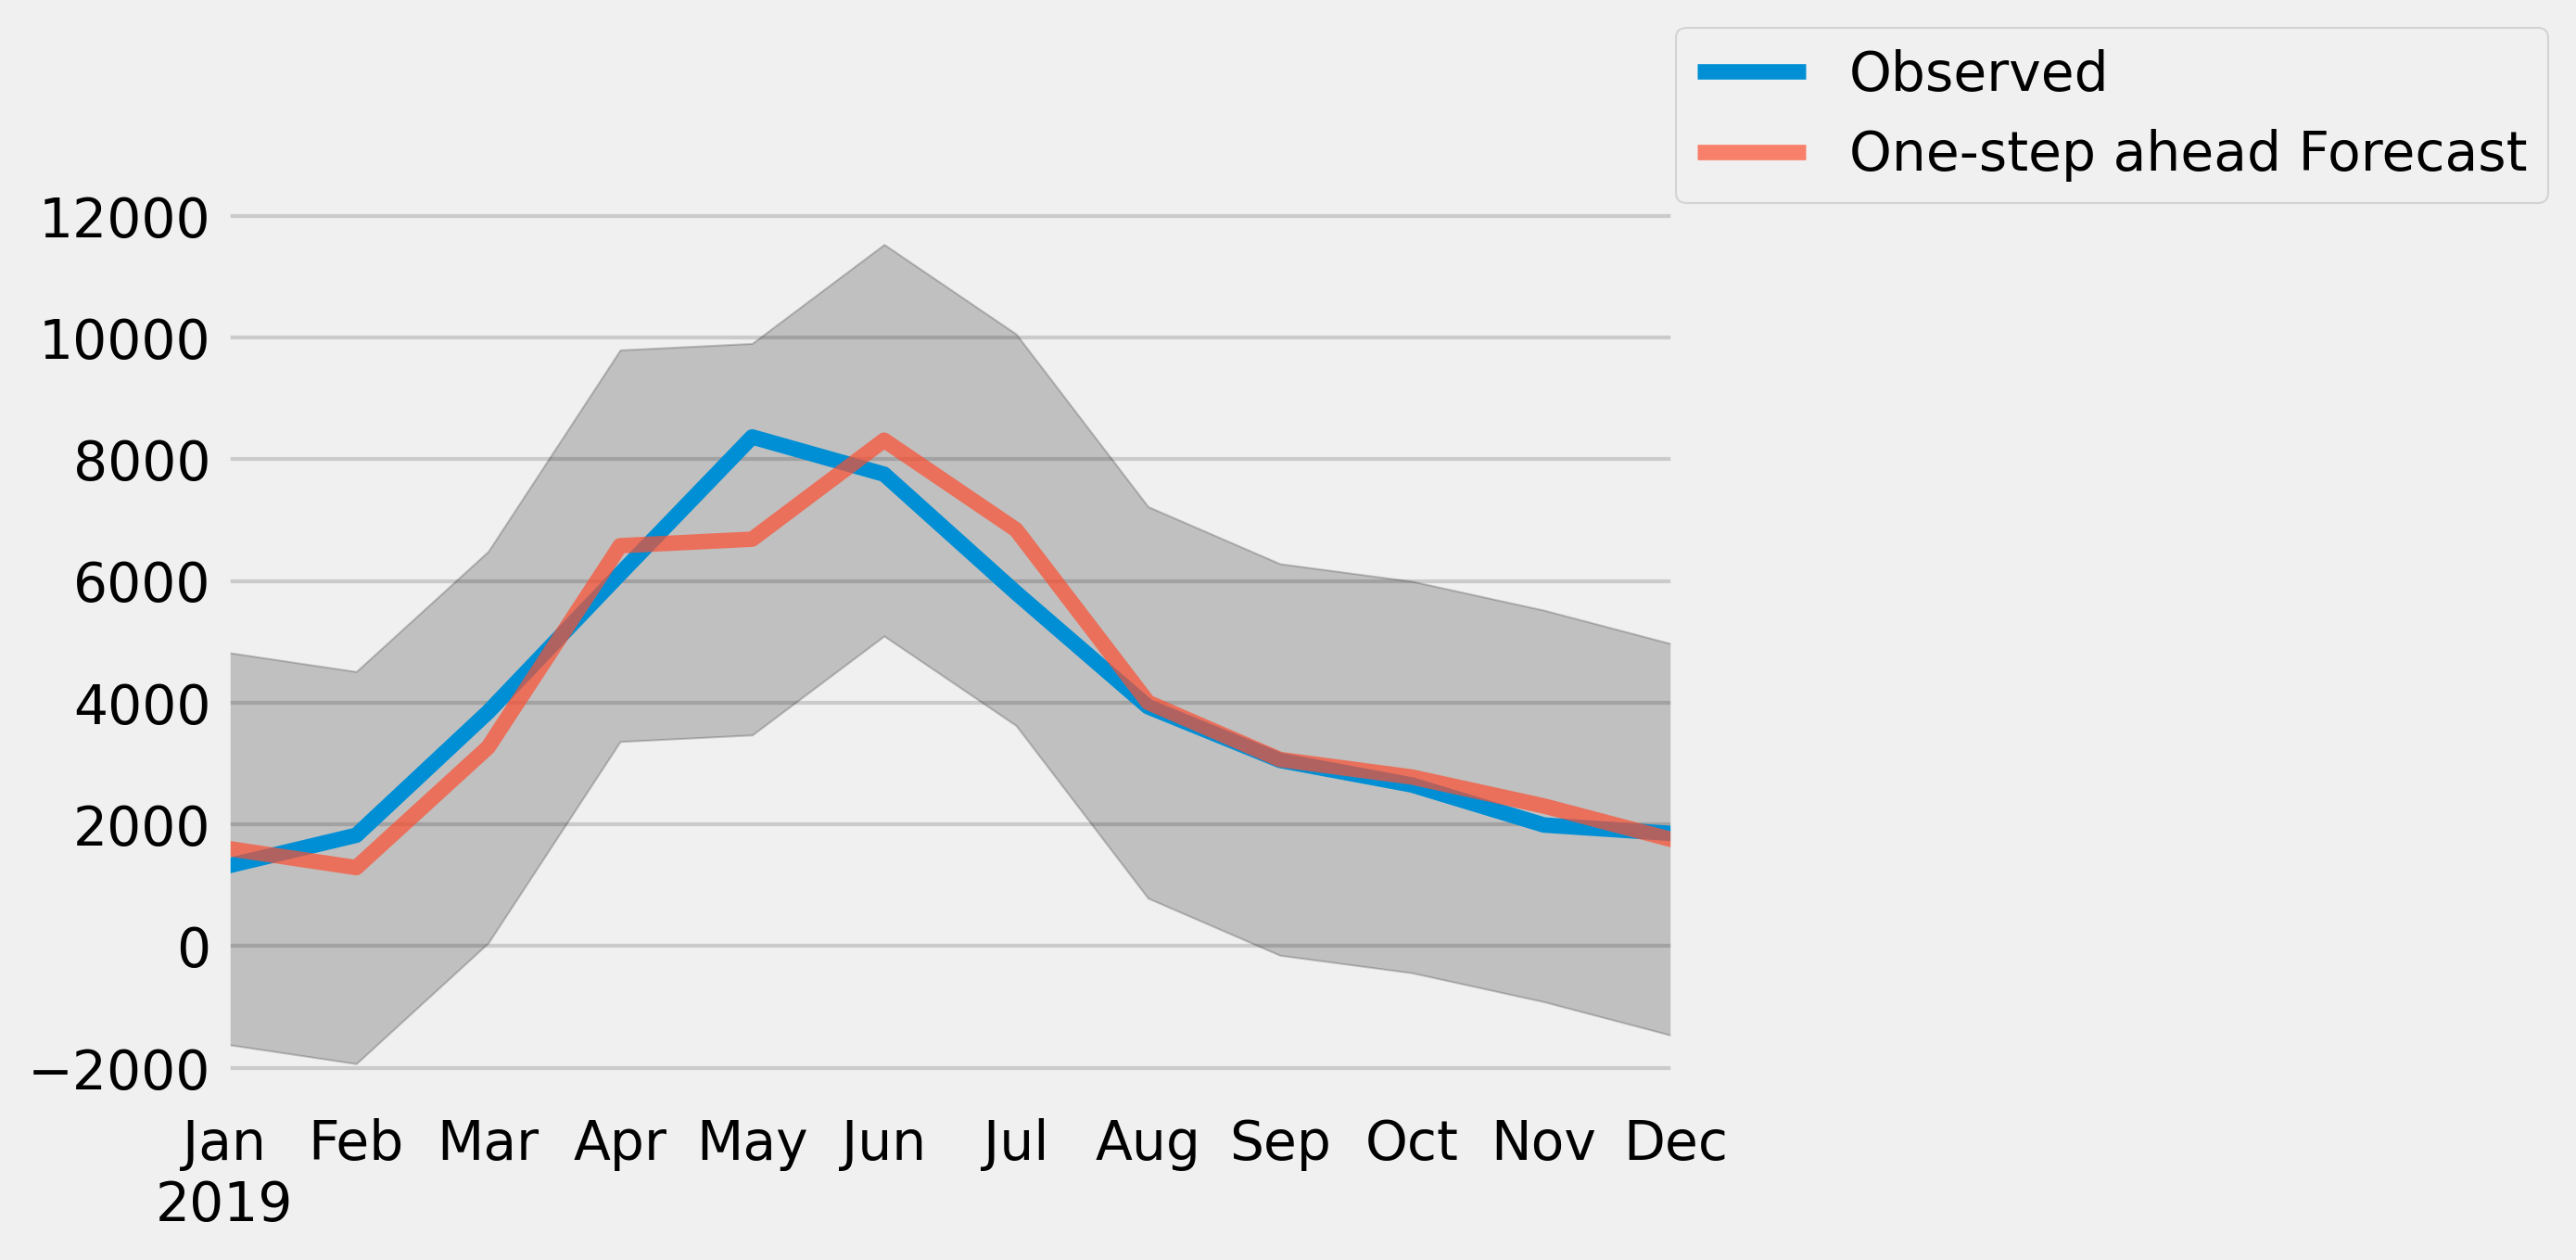

In [26]:
ax = y['2019':].plot(label='Observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7)
ax.fill_between(pred_ci.index, pred_ci.iloc[:, 0], pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('')
# ax.set_ylabel('CO2 Levels')
plt.legend(loc=(1,1))

plt.show()

In [27]:
# Predicting 2019
pred_dynamic = results.get_prediction(start=pd.to_datetime('2019-01-31'), dynamic=True, full_results=True)
pred_dynamic_ci = pred.conf_int()

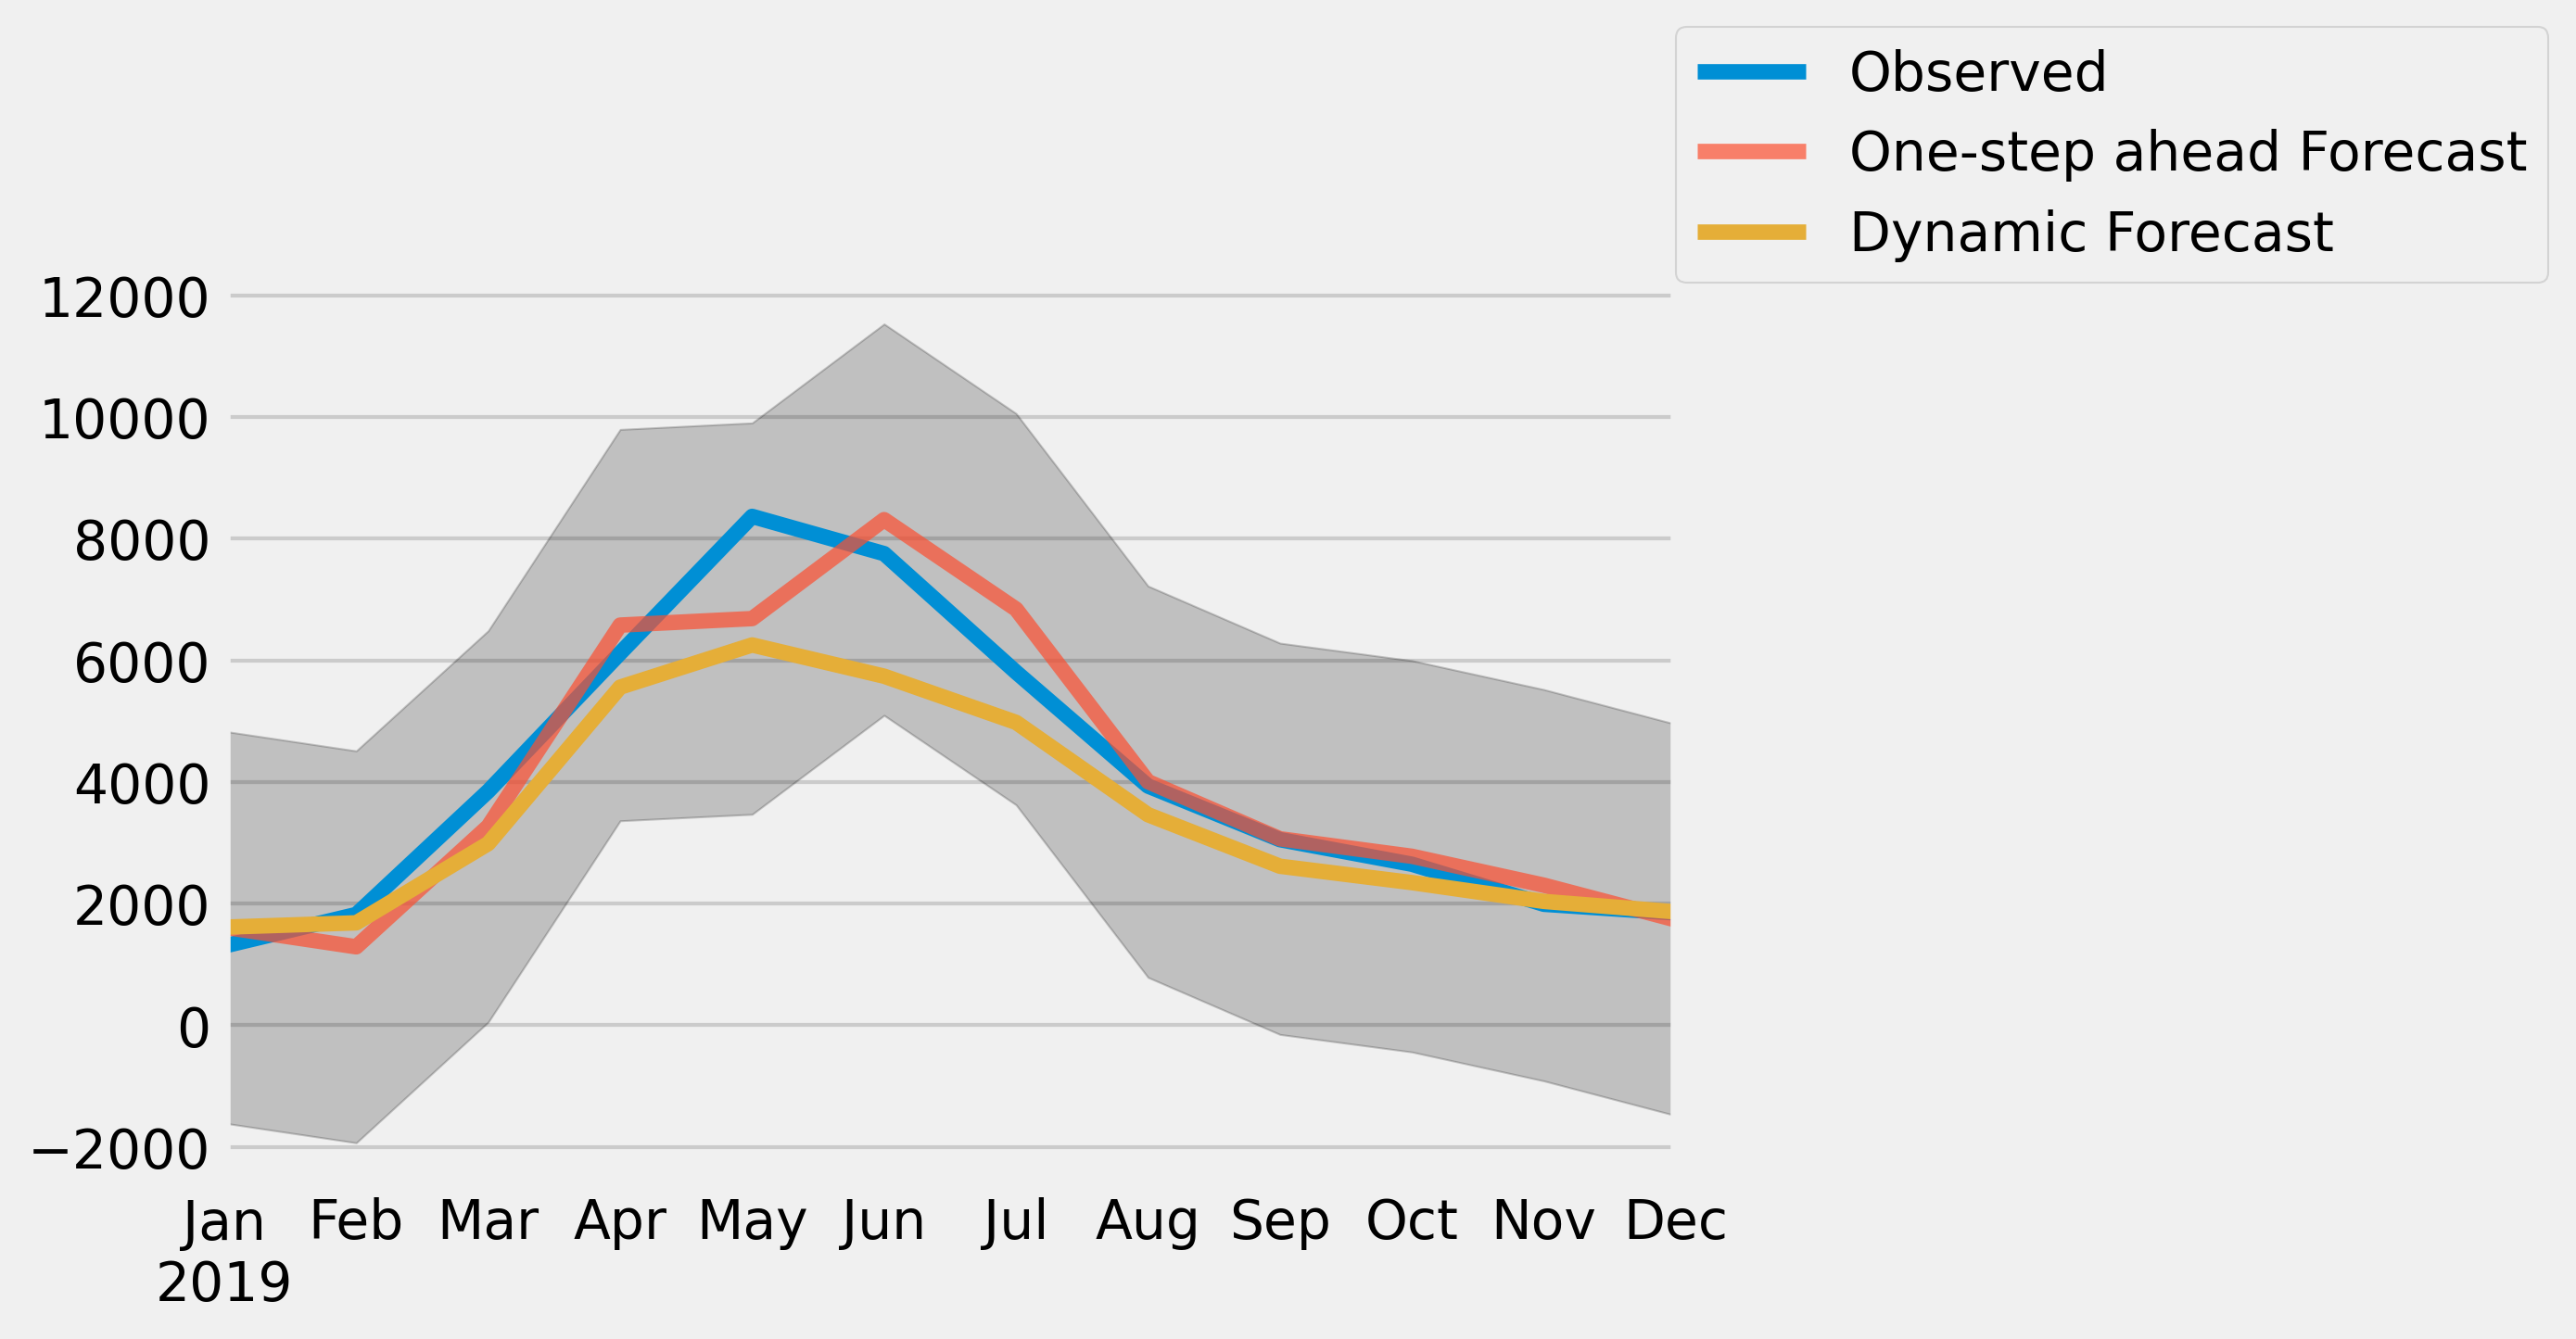

In [28]:
ax = y['2019':].plot(label='Observed')

pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7)
ax.fill_between(pred_ci.index, pred_ci.iloc[:, 0], pred_ci.iloc[:, 1], color='k', alpha=.2)

pred_dynamic.predicted_mean.plot(label='Dynamic Forecast', ax=ax)

# ax.fill_between(pred_dynamic_ci.index,
#                 pred_dynamic_ci.iloc[:, 0],
#                 pred_dynamic_ci.iloc[:, 1], color='green', alpha=.25)

# ax.fill_betweenx(ax.get_ylim(), pd.to_datetime('2019-01-31'), y.index[-1],
#                  alpha=.1, zorder=-1)

ax.set_xlabel('')

plt.legend(loc=(1,1))
plt.show() 

In [29]:
pred_uc = results.get_forecast(steps=12)

# Get confidence intervals of forecasts
pred_ci = pred_uc.conf_int()

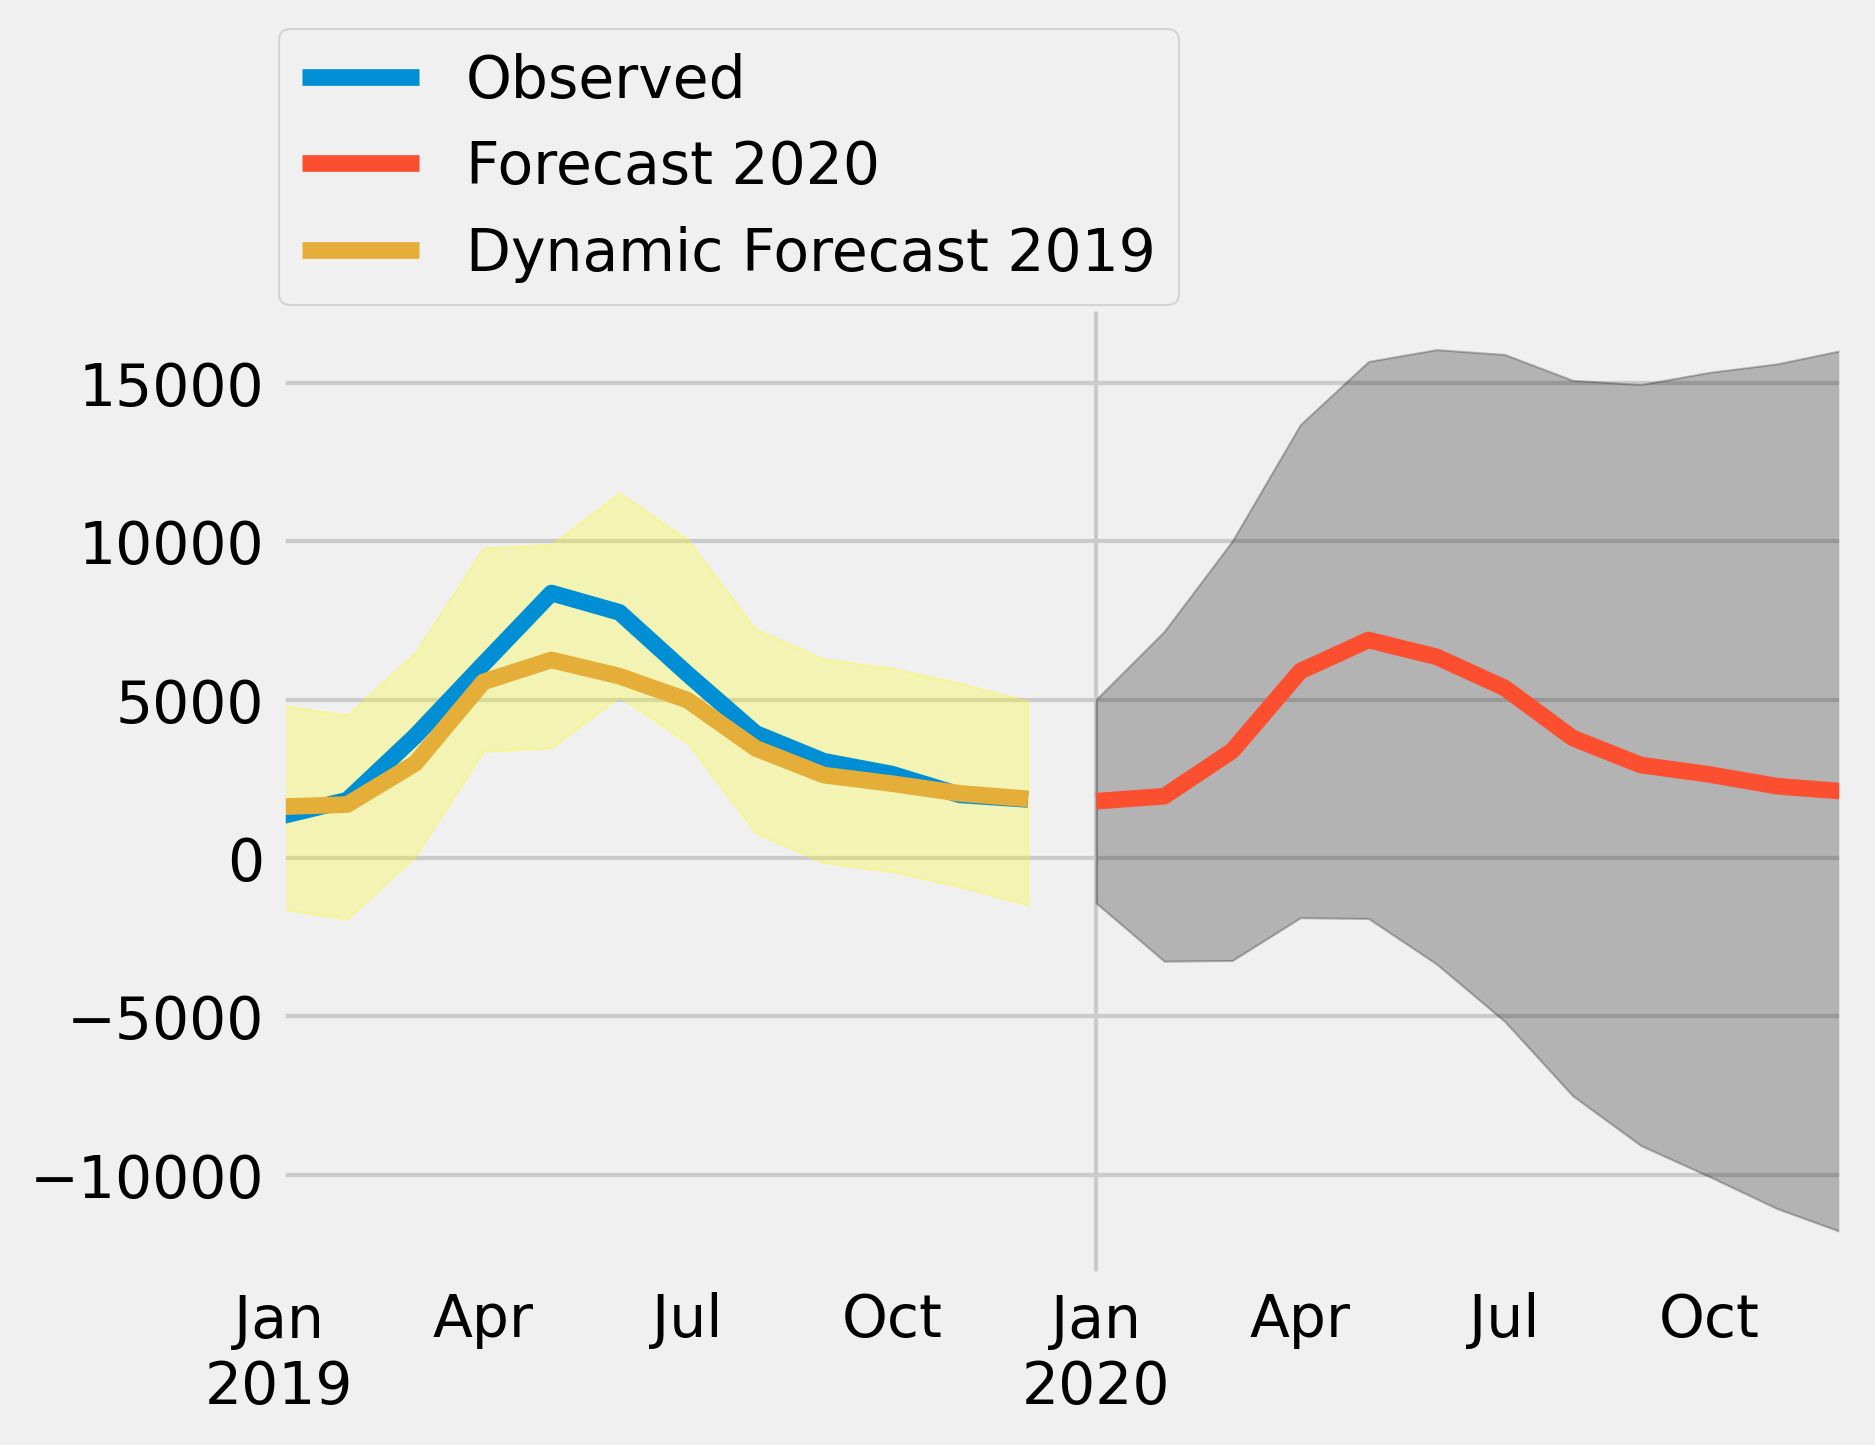

In [30]:
ax = y['2019':].plot(label='Observed')
pred_uc.predicted_mean.plot(ax=ax, label='Forecast 2020')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)


pred_dynamic.predicted_mean.plot(label='Dynamic Forecast 2019', ax=ax)

ax.fill_between(pred_dynamic_ci.index,
                pred_dynamic_ci.iloc[:, 0],
                pred_dynamic_ci.iloc[:, 1], color='yellow', alpha=.25)
ax.set_xlabel('')
# ax.set_ylabel('')

plt.legend(loc=(0,1))
plt.show()